**```Task 1```**

Generate the sequence of 20 random integer values from 0 to 100.   
Build the plot that joins each neighbour's values as shown on the image for  .
Consider the values as the heights of 2d mountains on which the rain falls   
from above. Those subsequences that have larger values on boundaries   
form the lakes.   
1) Develop the function that accepts the list of provided 20 integer   
values and calculates the depth of the deepest lake. Considering the   
above example, the response should be 89 which is the depth of the   
lake formed by subsequence [93, 4, 53, 87, 97].   

2) Visualize the values as heights and highlight the deepest lake.

In [2]:
import random
import matplotlib.pyplot as plt



In [83]:
sequence = random.sample(range(1, 101),20)
sequence

[67, 37, 24, 96, 82, 27, 76, 61, 10, 33, 32, 100, 81, 89, 62, 91, 11, 90, 3, 7]

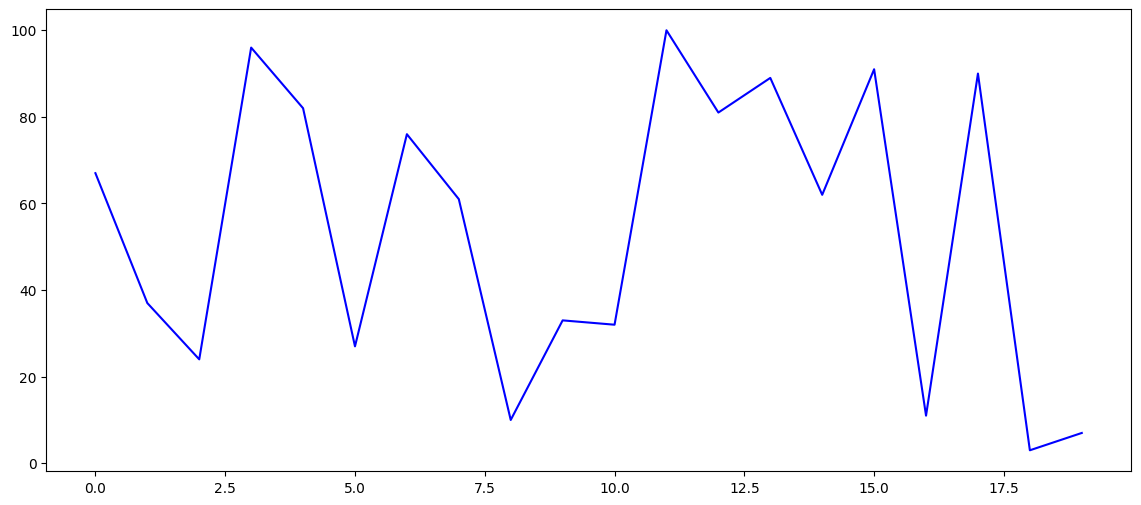

In [84]:
plt.figure(figsize=(14, 6))
plt.plot(sequence,color="blue")

In [ ]:
def find_deepest_lake(heights):
    max_depth = 0
    lake_start = lake_end = -1
    n = len(heights)
    
    for i in range(n):           #Лівий край
        for j in range(i+1, n):  #Правий край
            left = heights[i]
            right = heights[j]
            min_barrier = min(left, right)
    
            if j - i > 1:        #Знаходження мінімальної висоти
             min_in_between = min(heights[k] for k in range(i+1, j))
            else:
             min_in_between = float('inf')  

            depth = min_barrier - min_in_between
            #Якщо знайдено озеро такої ж глибини, але ширше
            if depth > max_depth or (depth == max_depth and (j - i) > (lake_end - lake_start)):
                max_depth = depth
                lake_start = i
                lake_end = j
                
    return max_depth, lake_start, lake_end
print(f"The depth of the deepest lake {find_deepest_lake(sequence)[0]}")


The depth of the deepest lake 86


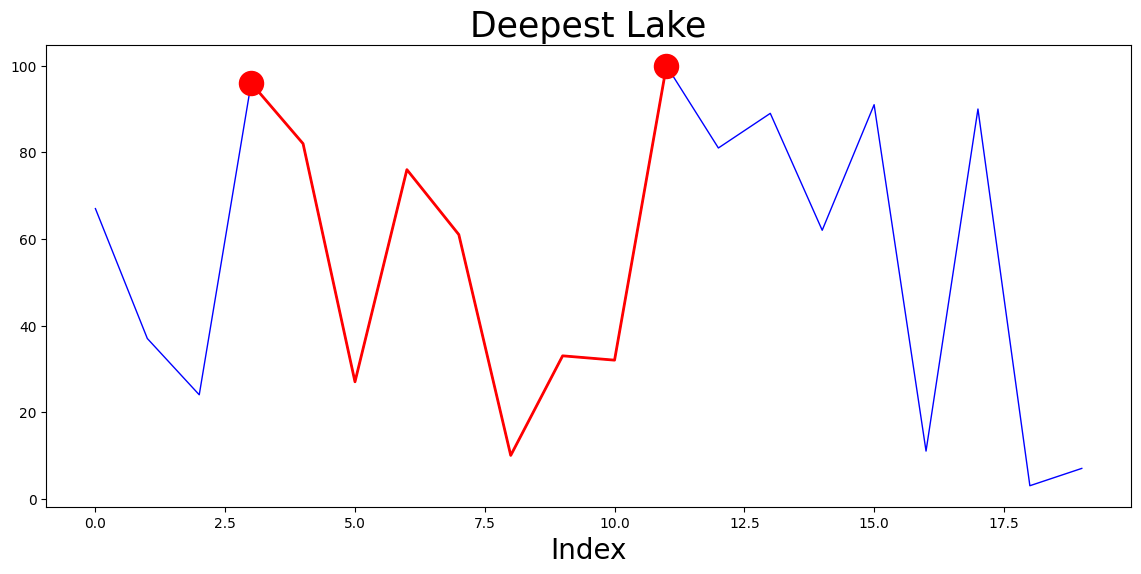

In [93]:

def visualize_deepest_lake(heights):
    depth, start, end = find_deepest_lake(heights)
    plt.figure(figsize=(14, 6))
    plt.plot(heights, color='blue', linewidth=1, markersize=2)
    if start != -1 and end != -1:
        min_barrier = min(heights[start], heights[end])
        plt.scatter([start, end], [heights[start], heights[end]], color='red', s=300, zorder=400,  )
        plt.plot(range(start, end+1), heights[start:end+1], color='red', linewidth=2)
    plt.title('Deepest Lake',size=25)
    plt.xlabel('Index',size=20)
    plt.ylabel('')
    plt.show()

    
visualize_deepest_lake(sequence)
